En este notebook, ilustramos cómo se puede buscar eficientemente una lista de terminos en un conjunto de textos. Por ejemplo: comunas de Los Lagos.

- Ejemplo básico de cómo utilizar el PhraseMatcher de spaCy
https://spacy.io/api/phrasematcher

In [59]:
import spacy
nlp = spacy.load("es_core_news_md")

In [60]:
from spacy.matcher import PhraseMatcher

In [61]:
matcher = PhraseMatcher(nlp.vocab)
matcher.add("OBAMA", [nlp("Barack Obama")])

In [62]:
doc = nlp("Barack Obama lifts America one last time in emotional farewell")
matches = matcher(doc)

In [63]:
for match_id, start, end in matches:
    span = doc[start:end]  # The matched span
    print(start,end)
    print(span.text.lower())

0 2
barack obama


- Ejemplo de uso del PhraseMatcher aplicado a la búsqueda de comunas de Los Lagos en un dataset de noticias

In [52]:
cities = ["Ancud","Castro","Chonchi",
           "Curaco de Vélez", "Dalcahue","Puqueldón",
          "Queilén","Quemchi","Quellón",
           "Quinchao","Calbuco","Cochamó",
          "Fresia","Frutillar","Llanquihue",
           "Los Muermos","Maullín","Puerto Montt",
          "Puerto Varas","Osorno","Puerto Octay",
          "Purranque","Puyehue","Río Negro",
           "San Juan de la Costa","San Pablo","Chaitén",
          "Futaleufú","Hualaihué","Palena"]

In [38]:
matcher_cities = PhraseMatcher(nlp.vocab)

for city in cities:
    matcher_cities.add(city, [nlp(city)])

In [39]:
len(matcher_cities)

30

In [120]:
import pandas

archivo = "./data/los_lagos_2021-10-01_2021-10-08.csv"
dataset = pandas.read_csv(archivo)

In [121]:
dataset.drop('Unnamed: 0', axis=1, inplace=True)  

In [122]:
dataset[157:161]

,id_news,country,media_outlet,url,title,text,date,search
157,21380428.0,chile,elhuemul,https://www.elhuemul.cl/2021/10/06/gobierno-an...,Gobierno anuncia cambios en el Plan Fronteras ...,Las personas con Pase de Movilidad o certifica...,2021-10-06,NaN
158,21380646.0,chile,elhuemul,https://www.elhuemul.cl/2021/10/06/agencias-de...,Agencias de Aduanas de la Región de Los Lagos ...,La CDE es una de las medidas de modernización ...,2021-10-06,NaN
159,21380695.0,chile,radiopudeto,http://www.pudeto.cl/?p=55332,Compañeros de trabajo del Hospital de Ancud de...,NaN,2021-10-06,NaN
160,21380784.0,chile,radiopudeto,http://www.pudeto.cl/?p=55327,Alcalde de Ancud se reunió con subsecretaria d...,En el marco de la reuniones sostenidas por el ...,2021-10-05,NaN


In [123]:
for index,row in dataset.iterrows():
    print(index)
    txt = row["text"]
    
    try:
    
        doc = nlp(txt)
        matches_cities = matcher_cities(doc)

        for match_id, start, end in matches_cities:
            span = doc[start:end]  # The matched span

            print(span.text)
    
    except:
        pass

0
Ancud
Ancud
Ancud
1
Puerto Montt
Osorno
Puerto Varas
Chonchi
Calbuco
Cochamó
Río Negro
Futaleufú
Palena
Ancud
Quellón
2
Puerto Montt
Puerto Montt
3
Puerto Montt
Osorno
Puerto Montt
Puerto Montt
Osorno
Puerto Montt
4
Castro
5
6
Calbuco
Quemchi
Quinchao
Puqueldón
Quellón
7
8
Puerto Montt
Maullín
Hualaihué
Castro
Puerto Varas
Ancud
Osorno
Futaleufú
Chaitén
9
Llanquihue
Llanquihue
Llanquihue
Puerto Varas
Llanquihue
Frutillar
Puerto Octay
Puerto Varas
Llanquihue
Frutillar
Puerto Octay
Puerto Varas
10
11
Frutillar
Frutillar
Puerto Montt
12
Puerto Montt
Osorno
Calbuco
Quellón
Castro
Chaitén
Futaleufú
Palena
Osorno
13
Llanquihue
14
15
Osorno
16
17
Osorno
Osorno
18
Osorno
19
Osorno
Osorno
Osorno
20
Osorno
Osorno
21
Osorno
22
Osorno
Osorno
23
Osorno
Osorno
Puerto Montt
24
Osorno
Osorno
25
Puerto Montt
Osorno
26
Puerto Montt
Puerto Montt
27
Puerto Montt
Puerto Montt
Puerto Montt
Puerto Montt
Puerto Montt
28
Puerto Montt
Puerto Montt
Puerto Montt
29
Puerto Montt
Puerto Montt
Puerto Montt
30
Puer

326
327
328
329
330
331
332
333
334
Purranque
Osorno
Osorno
Purranque
335
Osorno
Osorno
Osorno
Río Negro
Puerto Montt
Calbuco
Castro
Quellón
Chaitén
Futaleufú
Palena
336
Osorno
Purranque
Río Negro
Osorno
Purranque
Río Negro
Puyehue
San Pablo
Puerto Octay
San Juan de la Costa
San Pablo
Puerto Varas
Osorno
Osorno
337
338
Osorno
Osorno
339
340
341
342
343
344
345
346
Osorno
Llanquihue
347
348
349
350
351
352
353
354
Castro
Quellón
Puqueldón
Quellón
355
356
357
358
359
360
361
362
363
364
Puerto Varas
Puerto Montt
Puerto Varas
Puerto Montt
Puerto Montt
365
Puerto Montt
Puerto Montt
Puerto Montt
366
Llanquihue
367
Puerto Montt
Puerto Montt
Osorno
Castro
Puerto Montt
Osorno
Castro
Puerto Montt
368
Ancud
369
370
371
372
373
Puerto Montt
Puerto Montt
Puerto Montt
Llanquihue
374
375
376
Puerto Montt
Puerto Montt
Puerto Montt
Puerto Montt
377
Puerto Montt
Puerto Montt
Puerto Montt
Puerto Montt
Puerto Montt
378
Maullín
379
Puerto Montt
Puerto Montt
Puerto Montt
Llanquihue
Puerto Montt
380
Río Neg

- Guardar los datos en el dataframe

In [124]:
dataset_cities = dataset

for city in cities:
    dataset_cities.insert(7,city.replace(" ","_"),0)

In [125]:
dataset_cities.columns.values

array(['id_news', 'country', 'media_outlet', 'url', 'title', 'text',
       'date', 'Palena', 'Hualaihué', 'Futaleufú', 'Chaitén', 'San_Pablo',
       'San_Juan_de_la_Costa', 'Río_Negro', 'Puyehue', 'Purranque',
       'Puerto_Octay', 'Osorno', 'Puerto_Varas', 'Puerto_Montt',
       'Maullín', 'Los_Muermos', 'Llanquihue', 'Frutillar', 'Fresia',
       'Cochamó', 'Calbuco', 'Quinchao', 'Quellón', 'Quemchi', 'Queilén',
       'Puqueldón', 'Dalcahue', 'Curaco_de_Vélez', 'Chonchi', 'Castro',
       'Ancud', 'search'], dtype=object)

In [138]:
for index,row in dataset_cities.iterrows():
    print(index)
    txt = row["text"]
    
    try:
    
        doc = nlp(txt)
        matches_cities = matcher_cities(doc)

        for match_id, start, end in matches_cities:
            span = doc[start:end]  # The matched span
            dataset_cities.at[index,span.text.replace(" ","_")]=1
    except Exception as e:
        print(e)
        pass

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
[E866] Expected a string or 'Doc' as input, but got: <class 'float'>.
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
[E866] Expected a string or 'Doc' as input, but got: <class 'float'>.
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
24

In [140]:
from pandasql import sqldf 

In [196]:
result = sqldf("SELECT sum(Ancud),sum(Castro),sum(Chonchi),sum(Curaco_de_Vélez),sum(Dalcahue),sum(Puqueldón),sum(Queilén),sum(Quemchi),sum(Quellón),sum(Quinchao),sum(Calbuco),sum(Cochamó),sum(Fresia),sum(Frutillar),sum(Llanquihue),sum(Los_Muermos),sum(Maullín),sum(Puerto_Montt),sum(Puerto_Varas),sum(Osorno),sum(Puerto_Octay),sum(Purranque),sum(Puyehue),sum(Río_Negro),sum(San_Juan_de_la_Costa),sum(San_Pablo),sum(Chaitén),sum(Futaleufú),sum(Hualaihué),sum(Palena) FROM dataset_cities")
result

,sum(Ancud),sum(Castro),sum(Chonchi),sum(Curaco_de_Vélez),sum(Dalcahue),sum(Puqueldón),sum(Queilén),sum(Quemchi),sum(Quellón),sum(Quinchao),...,sum(Puerto_Octay),sum(Purranque),sum(Puyehue),sum(Río_Negro),sum(San_Juan_de_la_Costa),sum(San_Pablo),sum(Chaitén),sum(Futaleufú),sum(Hualaihué),sum(Palena)
0,50,66,17,14,21,9,1,7,36,14,...,13,13,8,11,11,8,11,7,4,9


- Visualizar los datos en un mapa

In [146]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [161]:
def territory_map(id_region: int = 10):
    # fuente: https://www.bcn.cl/siit/mapas_vectoriales
    territory = gpd.read_file(r'./shape/comunas.shp')

    # Filtramos segun id_region: Ejemplo 14 para la region XIV (Los Rios)
    territory = territory[territory["codregion"] == id_region]

    # Obtenemos los datos de las Columnas "Comuna", "geometry"
    territory = territory[["Comuna", "geometry"]]

    return territory

In [172]:
def save_map(df, territory, image_name: str = "Mapa_Calor"):
    
    #Junta las tablas df y Pais
    territory = territory.merge(df, on = "Comuna")
    
    #Inicializa matplotlib para la creacion del mapa
    fig, ax = plt.subplots(1, 1)
    max_presente = df.max()[1]#valore maximo para la barra de calor
    territory.plot(column = 'Valor',ax=ax,edgecolor = "gray", cmap = 'OrRd', legend = False).set_axis_off()
    bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0,vmax=max_presente))
    bar_info._A = []
    cbar = fig.colorbar(bar_info)
    
    #Guardar imagen en nombre_imagen
    plt.savefig('.//{}.svg'.format(image_name), bbox_inches = "tight",transparent = True)

San Pablo
PuqueldÃ³n
Fresia
Llanquihue
Osorno
Purranque
Puyehue
CochamÃ³
Ancud
QuellÃ³n
QueilÃ©n
Chonchi
Puerto Montt
RÃ­o Negro
Castro
Dalcahue
Quemchi
San Juan de la Costa
Calbuco
ChaitÃ©n
Los Muermos
MaullÃ­n
Quinchao
Curaco de VÃ©lez
Puerto Octay
Frutillar
Puerto Varas
HualaihuÃ©
Palena
FutaleufÃº


<Figure size 3000x6000 with 0 Axes>

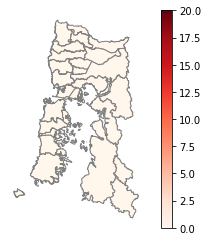

In [199]:
territory = territory_map(10)
lista =[]
n = 20
for i in territory["Comuna"]:
    print(i)
    lista.append({"Comuna": i, "Valor": n})
df = pandas.DataFrame(lista)

save_map(df, territory, "Mapa")